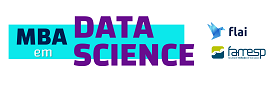

# **Meteorologia**

## **Entendendo o contexto**

### **Meteorologia**

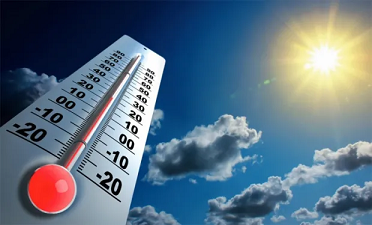

### **O Objetivo da Aula**

Compreender a meteorologia em 5 municípios distintos das 5 grandes regiões do Brasil através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos da base de dados do INMET - Instituto Nacional de Meteorologia, foram estruturados de forma que cada instância é uma dia de determinado ano em determinado município, e os atributos são:

- **data:**; Data da Medição
- **precipitacao_total:**; Precipitação Pluviométrica total
- **pressao_atmosferica_media:** Pressão Atmosférica média diária (mB);
- **temperatura_ponto_orvalho_media:** Temperatura do Ponto de Orvalho média diária (°C);
- **temperatura_media:** Temperatura média diária (°C);
- **umidade_ar_media:** Umidade Relativa do ar média diária (%);
- **velocidade_vento_media:** Velocidade do vento média diária (m/s);

Os conjunto de dados estão disponíveis em um repositório no GitHub que pode ser acessado através dos links:

- https://raw.githubusercontent.com/jonates/opendata/master/inmet/inmet.csv


### **A Biblioteca Seaborn**

matplotlib é uma biblioteca python, baseada na Matplotlib, para visualização de dados. 

Para maiores informações da Altair, consulte a documentação no endereço a seguir:

- https://seaborn.pydata.org/

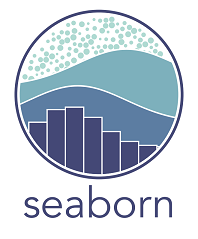

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [144]:
# Importando o Pandas
import pandas as pd

In [145]:
# Importando o conjunto de dados
inmet = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/inmet/inmet.csv', 
    sep=';',
    decimal='.'
)

### **Entendendo a estrutura o conjunto de dados**

In [146]:
# Espiando o conjunto de dados
inmet.head()

,data,precipitacao_total,pressao_atmosferica_media,temperatura_ponto_orvalho_media,temperatura_media,umidade_ar_media,velocidade_vento_media,municipio
0,2003-01-19,NaN,NaN,NaN,NaN,NaN,NaN,Belém
1,2003-01-20,NaN,NaN,NaN,NaN,84.461538,NaN,Belém
2,2003-01-21,4.8,1009.108333,22.7500,25.233333,86.750000,1.370833,Belém
3,2003-01-22,6.0,1009.220833,22.8375,25.275000,86.791667,1.037500,Belém
4,2003-01-23,0.0,1010.320833,22.6750,25.104167,86.708333,1.358333,Belém


In [147]:
# Espiando a estrutura do conjunto de dados
inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29915 entries, 0 to 29914
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   data                             29915 non-null  object 
 1   precipitacao_total               26706 non-null  float64
 2   pressao_atmosferica_media        27408 non-null  float64
 3   temperatura_ponto_orvalho_media  27301 non-null  float64
 4   temperatura_media                26951 non-null  float64
 5   umidade_ar_media                 27964 non-null  float64
 6   velocidade_vento_media           23252 non-null  float64
 7   municipio                        29915 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


### **Transformando o conjunto de dados**

In [148]:
# Transformando o atributo 'data' em datetime
inmet['data'] = pd.to_datetime(inmet['data'], infer_datetime_format=True)

In [149]:
# Criando as variaveis dia , mes e ano
inmet['ano'] = inmet['data'].dt.year
inmet['mes'] = inmet['data'].dt.month
inmet['dia'] = inmet['data'].dt.day

In [150]:
# Espiando a estrutura do conjunto de dados
inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29915 entries, 0 to 29914
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   data                             29915 non-null  datetime64[ns]
 1   precipitacao_total               26706 non-null  float64       
 2   pressao_atmosferica_media        27408 non-null  float64       
 3   temperatura_ponto_orvalho_media  27301 non-null  float64       
 4   temperatura_media                26951 non-null  float64       
 5   umidade_ar_media                 27964 non-null  float64       
 6   velocidade_vento_media           23252 non-null  float64       
 7   municipio                        29915 non-null  object        
 8   ano                              29915 non-null  int64         
 9   mes                              29915 non-null  int64         
 10  dia                              29915 non-null  int64    

In [151]:
# Filtrando somente o período 2010-2020
inmet_10_20 = inmet.query('data>"2009-12-31"')


### **Análise da meteorologia em 5 municípios Brasileiros 2010 - 2020**

In [152]:
# Importando as bibliotecas necessarias
import seaborn as sns
import matplotlib.pyplot as plt

#### **Comportamento da temperatura média 2010 - 2020**

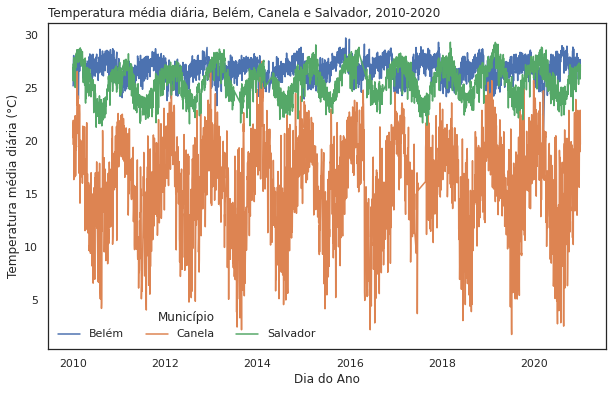

In [153]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(10, 6))

# Criando o grafico
ax = sns.lineplot(
    data=inmet_10_20.query('(municipio=="Salvador") | (municipio=="Canela") | (municipio=="Belém")'), 
    x="data", 
    y="temperatura_media", 
    hue = 'municipio'
)

# Inserindo o título
ax.set_title('Temperatura média diária, Belém, Canela e Salvador, 2010-2020', loc ='left')

# Inserindo rótulos dos eixos
plt.xlabel("Dia do Ano")
plt.ylabel("Temperatura média diária (°C)")

# Ajustando a  legenda
plt.legend(
    title='Município', 
    loc='lower left',
    #mode = "expand", 
    ncol = 3 , 
    frameon=False
)

# Exibindo o gráfico
plt.show()


#### **Temperatura média mensal, 2010 - 2020**

In [154]:
temperatura_mes = inmet_10_20\
    .groupby(['municipio','mes'],as_index=False)\
    .agg({'temperatura_media': 'mean'})

temperatura_mes.head()

,municipio,mes,temperatura_media
0,Belém,1,26.263612
1,Belém,2,26.004564
2,Belém,3,26.116194
3,Belém,4,26.333620
4,Belém,5,26.661485


In [155]:
# Pivotando o dataset
temperatura_mes_pivotado = temperatura_mes.pivot("municipio", "mes", "temperatura_media")
temperatura_mes_pivotado

mes,1,2,3,4,5,6,7,8,9,10,11,12
municipio,,,,,,,,,,,,
Belém,26.263612,26.004564,26.116194,26.333620,26.661485,26.878554,26.916651,27.238652,27.419570,27.476320,27.583215,26.947910
Brasília,21.943931,21.955036,21.788852,21.594975,20.376432,19.577508,19.408432,21.200122,23.447072,23.362659,21.664230,21.839944
Canela,20.278386,20.213398,18.306476,16.447674,13.458304,12.074266,11.749763,13.189192,14.279690,15.646420,17.176326,19.347153
Nova Friburgo,20.051160,20.082663,19.119646,17.296269,14.914328,14.464861,13.451797,14.045119,16.048725,17.548072,17.885619,19.587149
Salvador,27.006714,27.420362,27.340468,26.433709,25.376016,24.599598,23.880376,23.792651,24.392034,25.497401,26.072666,26.664231


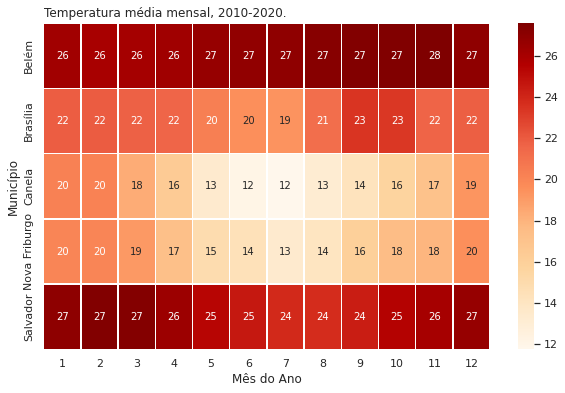

In [156]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(10, 6))

# Construindo o heatmap
ax = sns.heatmap(
    data = temperatura_mes_pivotado, 
    annot=True, 
    linewidths=.5, 
    cmap="OrRd", 
    cbar=True
);

# Inserindo o título
ax.set_title('Temperatura média mensal, 2010-2020.', loc ='left')

# Inserindo rótulos dos eixos
plt.xlabel("Mês do Ano")
plt.ylabel("Município")

# Exibindo o gráfico
plt.show()

- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://matplotlib.org/stable/gallery/color/colormap_reference.html

#### **Precipitação Pluviométrica, Belém, 2010 - 2020**

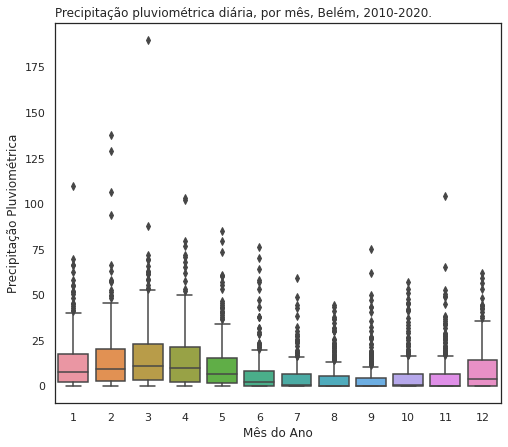

In [157]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(8, 7))

# Desenhando o Boxplot
ax = sns.boxplot(
    data = inmet_10_20.query('municipio=="Belém"'),
    x="mes", 
    y="precipitacao_total" 
)


# Inserindo o título
ax.set_title(
    label = 'Precipitação pluviométrica diária, por mês, Belém, 2010-2020.', 
    loc ='left'
)

# Inserindo rótulos dos eixos
plt.xlabel("Mês do Ano")
plt.ylabel("Precipitação Pluviométrica")

# Exibindo o gráfico
plt.show()

#### **Distribuições das temperaturas média diária por mês em Salvador**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


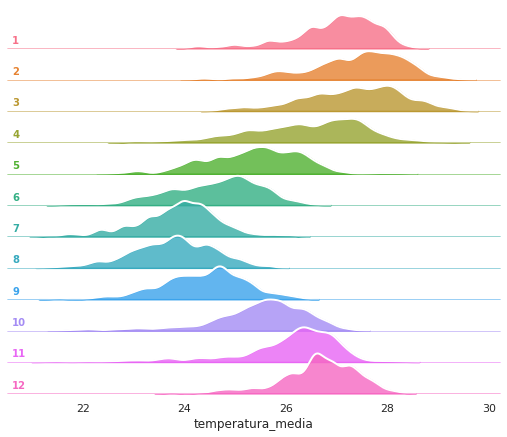

In [158]:
# Criando o objeto FacetGrid - Grade para plotagem múltipla de gráficos
g = sns.FacetGrid(
    data = inmet_10_20.query('municipio=="Salvador"'), 
    row="mes", 
    hue="mes", 
    aspect=15, 
    height=0.5, 
    palette=sns.color_palette("husl", 12)
)

# Desenhando as densidades
g.map(sns.kdeplot, "temperatura_media",
    linewidth=1.5,
    fill=True, 
    alpha=0.8,
    clip_on=False, # Ajustes nas extremidades das curvas
    bw_adjust=.5, # suavização da curva
)

# Insere um contorno de densidade com linha branca para ficar mais visível nas sobreposições
g.map(sns.kdeplot, "temperatura_media", 
      clip_on=False, 
      color="w", 
      linewidth=2, 
      bw_adjust=0.5
)

# Inserindo linhas embaixo de cada gráfico de densidade baseado nas cores
g.refline(
    y=0, 
    linewidth=0.5, 
    linestyle="-", 
    color=None, 
    clip_on=False
)

# inserindo uma função e aplicando para 

# Definindo e aplicando uma função para colocar os rotulos dos meses
def define_rotulos_eixo_y(x, color, label):
    ax = plt.gca()
    ax.text(
        0.01, # Avanço no eixo x em relação ao ponto (0,0)  
        0.2, # Avanço no eixo x em relação ao ponto (0,0) 
        s=label, # texto para inserir como rotulo
        fontweight="bold", # Coloca em negrito
        color=color, # Define as cores. obs. está pegando as cores originais
        ha="left", # Alinamento horizontal
        va="center", # Alinhamento vertical 
        transform=ax.transAxes
    )

g.map(define_rotulos_eixo_y, "temperatura_media")

# Define sobreposição
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("") # Remove títulos dos gráficos
g.set(yticks=[], ylabel="") # Remove os rotulos dos eixos y
g.despine(bottom=True, left=True) # Remove o contornos dos eixos

- https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- 


#### **Saiba mais**

Para mais informações sobre outros tipos de gráficos no Seaborn, bem como para customizações acesse a documentação:
-  https://seaborn.pydata.org/api.html
- https://seaborn.pydata.org/examples/index.html
- https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.legend.html

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa gráficos com a biblioteca Seaborn, para visualizar o comportamento das criptmoedas.

O conjunto de dados está disponível para download no link:
- https://raw.githubusercontent.com/jonates/opendata/master/criptomoedas/criptomoedas.csv